<a href="https://colab.research.google.com/github/DoryGomez/Inteligencia_Artificial/blob/main/Tarea3_DGC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ORO!!! Forecasting

In [12]:
## Importando las librerías
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [13]:
dataframeGold = pd.read_csv('gold_price_data.csv')


In [14]:
print(dataframeGold.dtypes)
dataframeGold.head(10)

Date      object
Value    float64
dtype: object


,Date,Value
0,01/01/1970,35.2
1,01/04/1970,35.1
2,01/07/1970,35.4
3,01/10/1970,36.2
4,01/01/1971,37.4
5,01/04/1971,38.9
6,01/07/1971,40.1
7,01/10/1971,42.0
8,03/01/1972,43.5
9,03/04/1972,48.3


In [19]:
## Datos
etiqueta = np.array(dataframeGold['Value'])[2:]
car_m1 = np.array(dataframeGold['Value'])[1:-1]
car_m2 = car_m1
print("%d datos cargados para etiqueta" % len(etiqueta))
print("%d datos cargados para car_m1" % len(car_m1))


10785 datos cargados para etiqueta
10785 datos cargados para car_m1


In [36]:
def funcCosto(arr_1, arr_2):
  J = np.power(arr_1-arr_2,2)
  return np.sum(J)/(2*len(J))

  ## Prueba de la función de costo
print(funcCosto(etiqueta,etiqueta))
print(funcCosto(np.array([0, 1, 0, 1, 0,1]),np.array([1, 0, 1, 1, 1,1])))

0.0
0.3333333333333333


In [37]:
## Pasos GridSearch
#  h(x) = T0 + T1*x

# 1. Valores a T0 a T1
dict_resultados = dict()
for T0 in np.arange(-10,10,10/100):
  for T1 in np.arange(-10,10,10/100):

#   2. Encuentras h(x)
    h_x = T0 + T1*car_m1

#   3. Evalúar la función de costo
    dict_resultados[(T0,T1)]=funcCosto(h_x,etiqueta)
    
# 4. Encontrar el menor
parameters = list(dict_resultados.keys())
#print(parameters)
costValues = np.array(list(dict_resultados.values()))
#print(costValues)
indexMinCost = costValues.argmin()
print(indexMinCost)
bestParameters = parameters[indexMinCost]
print("Los mejores parámetros son:",bestParameters,"donde la función de costo retornó: ",costValues[indexMinCost])

20310
Los mejores parámetros son: (0.09999999999996412, 0.9999999999999609) donde la función de costo retornó:  40.79981759851674


Los mejores parámetros son: (0.09999999999996412, 0.9999999999999609) donde la función de costo retornó:  40.79981759851674


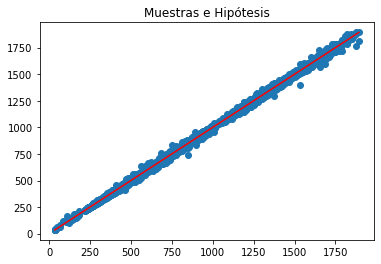

In [38]:
print("Los mejores parámetros son:",bestParameters,"donde la función de costo retornó: ",costValues[indexMinCost])
plt.scatter(car_m1,etiqueta)
x = np.arange(car_m1.min(),car_m1.max(),(car_m1.max()-car_m1.min())/1000)
plt.plot(x,bestParameters[0]+bestParameters[1]*x,'r-')
plt.title("Muestras e Hipótesis")
plt.show()

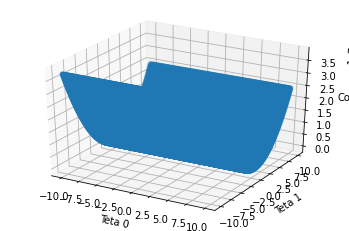

In [39]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D([p[0] for p in parameters],[p[1] for p in parameters],list(dict_resultados.values()))
ax.set_xlabel('Teta 0')
ax.set_ylabel('Teta 1')
ax.set_zlabel('Cost');